In [52]:
# Import data manipulation libraries
import pandas as pd  # For data processing and manipulation

# Import visualisation libraries
import matplotlib.pyplot as plt  # For creating plots and visualisations
import seaborn as sns  # For enhanced statistical visualisations

# Import model training and evaluation tools
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Import machine learning models
from sklearn.linear_model import LogisticRegression  # Basic classification model
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
from sklearn.ensemble import RandomForestClassifier  # Tree-based ensemble model
from xgboost import XGBClassifier  # Gradient boosting model

# Import joblib
import joblib

In [53]:
# Read the CSV file 'df.csv' into a pandas DataFrame
df = pd.read_csv('df.csv')

# Drop the unwanted column
df = df.drop('Unnamed: 0', axis=1)

# Checking the columns in the dataframe
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [54]:
# Split the dataset into features (X) and target variable (y)
# X contains all columns except 'Personality'
X = df.drop('Personality', axis=1)
# y contains only the 'Personality' column, which is our target for prediction
y = df['Personality']

In [55]:
# Checking the feature columns
X.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [56]:
# Split the dataset into training and testing sets
# - X_train, y_train: 80% of data used for training
# - X_test, y_test: 20% of data used for testing
# - random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of training and testing feature sets to verify the split
X_train.shape, X_test.shape

((2320, 7), (580, 7))

In [57]:
# Initialize the StandardScaler object to standardize features
scaler = StandardScaler()
# Fit the scaler to the training data and transform it (standardize features to have mean=0 and variance=1)
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the same scaling parameters from the training data
X_test_scaled = scaler.transform(X_test)

In [58]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = log_reg.predict(X_test)

# Print the model evaluation results
print('Logistic Regression Result')
# Display the confusion matrix to show true positives, false positives, etc.
print(confusion_matrix(y_test, y_pred_lr))
# Display precision, recall, f1-score and support metrics
print(classification_report(y_test, y_pred_lr))

Logistic Regression Result
[[258  20]
 [ 24 278]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [59]:
# Train the logistic regression model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lr_sc = log_reg.predict(X_test_scaled)

# Print the evaluation metrics for the logistic regression model using scaled data
print('Logistic Regression Result from Scaled Data')
print(confusion_matrix(y_test, y_pred_lr_sc))  # Display the confusion matrix
print(classification_report(y_test, y_pred_lr_sc))  # Display precision, recall, f1-score, and support

Logistic Regression Result from Scaled Data
[[256  22]
 [ 24 278]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       278
           1       0.93      0.92      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [60]:
# Initialize a Random Forest Classifier with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_predict_rf = rf.predict(X_test)

# Print the model evaluation results
print('Random Forest Classifier Result')
print(confusion_matrix(y_test, y_predict_rf))  # Display the confusion matrix
print(classification_report(y_test, y_predict_rf))  # Display precision, recall, f1-score, and support

Random Forest Classifier Result
[[257  21]
 [ 26 276]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       278
           1       0.93      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [61]:
# Initialize XGBoost classifier with logloss evaluation metric
xgb = XGBClassifier(eval_metric='logloss')

# Train the XGBoost model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Print the model evaluation results
print('XGBOOST Result')
print(confusion_matrix(y_test, y_pred_xgb))  # Display confusion matrix
print(classification_report(y_test, y_pred_xgb))  # Display precision, recall, f1-score, and support

XGBOOST Result
[[257  21]
 [ 28 274]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       278
           1       0.93      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



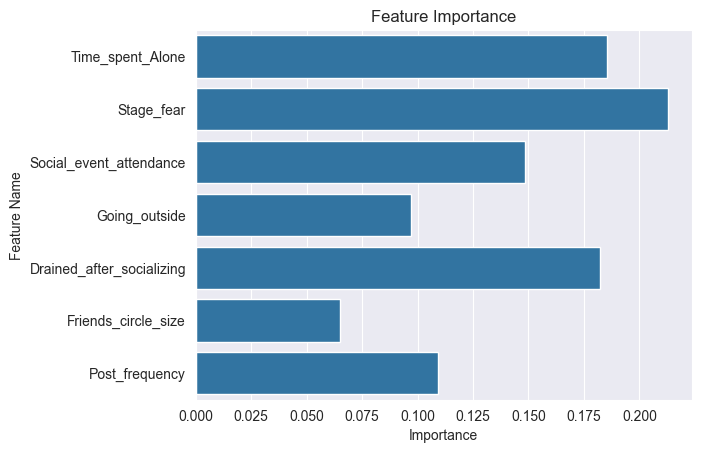

In [62]:
# Extract feature importance values from the random forest model
importance = rf.feature_importances_

# Get the feature names from the X dataframe columns
feature_name = X.columns

# Create a bar plot showing feature importance
sns.barplot(x=importance, y=feature_name)

# Add a title and axis labels to the plot
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')

# Display the plot
plt.show()

In [63]:
joblib.dump(rf, 'models/final_model.pkl')

['C:/Users/HUB/Desktop/extrovert_vs_introvert/models/final_model.pkl']

In [64]:
joblib.dump(log_reg, 'models/log_reg_model.pkl')

['C:/Users/HUB/Desktop/extrovert_vs_introvert/models/log_reg_model.pkl']

In [68]:
joblib.dump(xgb, 'models/xgb_model.pkl')

['C:/Users/HUB/Desktop/extrovert_vs_introvert/models/xgb_model.pkl']